<a href="https://colab.research.google.com/github/lakshh670/100_days_of_DeepLearning/blob/main/Batch_vs_Stochastic_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.drop(columns=['User ID','Gender'],inplace=True)

In [5]:
from sklearn.preprocessing import StandardScaler
x,y=df.drop(columns=['Purchased']),df['Purchased']
x=StandardScaler().fit_transform(x)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
x.shape[0]

400

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

# Batch Gradient-Descent

In [10]:
model=Sequential()
model.add(Dense(10,activation='relu',input_dim=x.shape[1]))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(loss='binary_crossentropy',metrics=['Accuracy'])
history=model.fit(x_train,y_train,epochs=500,batch_size=x.shape[0],validation_split=0.2) # batch_size=n i.e. batch GD

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 924ms/step - Accuracy: 0.8828 - loss: 0.4797 - val_Accuracy: 0.8906 - val_loss: 0.4790
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - Accuracy: 0.8828 - loss: 0.4733 - val_Accuracy: 0.8906 - val_loss: 0.4745
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - Accuracy: 0.8828 - loss: 0.4687 - val_Accuracy: 0.8906 - val_loss: 0.4708
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - Accuracy: 0.8828 - loss: 0.4650 - val_Accuracy: 0.8906 - val_loss: 0.4676
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - Accuracy: 0.8828 - loss: 0.4617 - val_Accuracy: 0.8906 - val_loss: 0.4647
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - Accuracy: 0.8828 - loss: 0.4587 - val_Accuracy: 0.8906 - val_loss: 0.4620
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - Accuracy: 0.8828 - loss: 0.4559 - val_Accuracy: 0.8906 - val_loss: 0.4595
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - Accuracy: 0.8828 - loss: 0.4532 - val_Accuracy: 0.8906 - val_loss

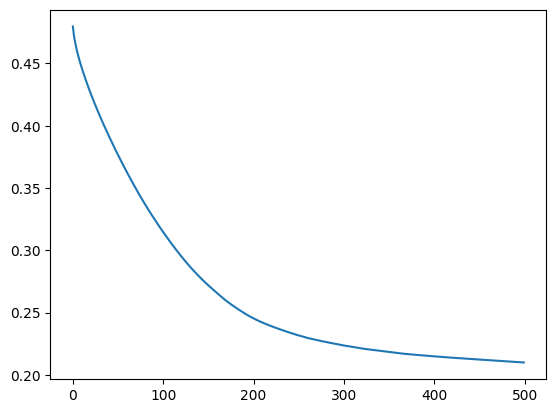

In [21]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])

# Stochastic Gradient-Descent

In [23]:
from keras.src.metrics.accuracy_metrics import accuracy
model=Sequential()
model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
history=model.fit(x_train,y_train,epochs=500,batch_size=1,validation_split=0.2) # batch_size=1 i.e. stochastic GD

Epoch 1/500
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6451 - loss: 0.6849 - val_accuracy: 0.7969 - val_loss: 0.5470
Epoch 2/500
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6875 - loss: 0.5623 - val_accuracy: 0.8438 - val_loss: 0.4528
Epoch 3/500
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8017 - loss: 0.4244 - val_accuracy: 0.8281 - val_loss: 0.4131
Epoch 4/500
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7831 - loss: 0.4205 - val_accuracy: 0.8438 - val_loss: 0.3958
Epoch 5/500
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8659 - loss: 0.3465 - val_accuracy: 0.8438 - val_loss: 0.3872
Epoch 6/500
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8202 - loss: 0.4476 - val_accuracy: 0.8438 - val_loss: 0.3812
Epoch 7/500
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8171 - loss: 0.3653 - val_accuracy: 0.8281 - val_loss: 0.3692
Epoch 8/500
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8369 - loss: 0.3200 - val_accu

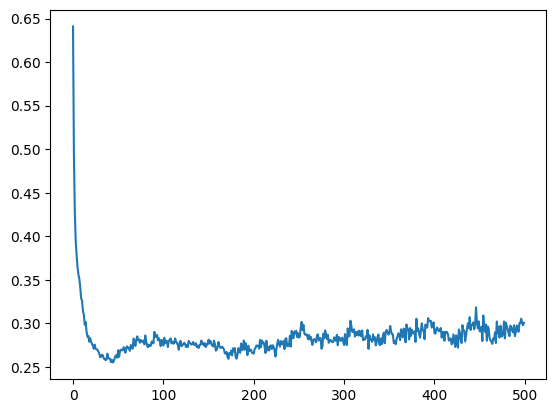

In [25]:
plt.plot(history.history['loss'])